가설

- (1) "중식계"가 많은 날 "석식계"가 많을 것이다?
- (2) 대체적으로 "금"요일에 석식계가 적을 것이다? (퇴근 빨리 하는 사람들이 많을 것 같다..)

### import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
Food = pd.read_csv("C:/Users/user/Documents/python/Dacon/data/식수예측/0321_코로나_식수_병합본.csv", encoding = "cp949")
Food

,Unnamed: 0,일자,defcnt,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,...,new_col(중식),new_col(석식),중식_1,중식_2,중식_3,석식_1,석식_2,석식_3,중식_1_CLEAN,석식_1_CLEAN
0,0,2016-02-01,0,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,...,x,x,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이,일반 밥,일반 밥
1,1,2016-02-02,0,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,...,x,x,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬,일반 밥,콩나물밥
2,2,2016-02-03,0,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,...,x,x,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이,카레덮밥,일반 밥
3,3,2016-02-04,0,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",...,x,x,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드,일반 밥,김밥
4,4,2016-02-05,0,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,...,x,x,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비,일반 밥,일반 밥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1200,2021-01-20,22852,수,2983,75,198,4,391,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,...,x,x,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,일반 밥,김치볶음밥
1201,1201,2021-01-21,22977,목,2983,92,231,462,351,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,...,x,x,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,흑미밥,쇠고기무국,삼치양념구이,일반 밥,흑미밥
1202,1202,2021-01-22,23092,금,2983,255,248,1,303,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,...,x,x,전주비빔밥*약고추장,계란파국,요거닭,흑미밥,수제비국,수제맛쵸킹탕수육,낙지비빔밥,흑미밥
1203,1203,2021-01-25,23453,월,2983,107,153,616,327,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,...,x,x,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,흑미밥,열무된장국,장어강정*데리야끼소스,일반 밥,흑미밥


### 시각화

#### 시계열 계절성 or 주기성
=> 근데 LH가 단순한 시계열 추세를 사용해서 예측해봤다고 했으니까, 시계열은 나중에 고려하자

In [11]:
from IPython.display import Image 

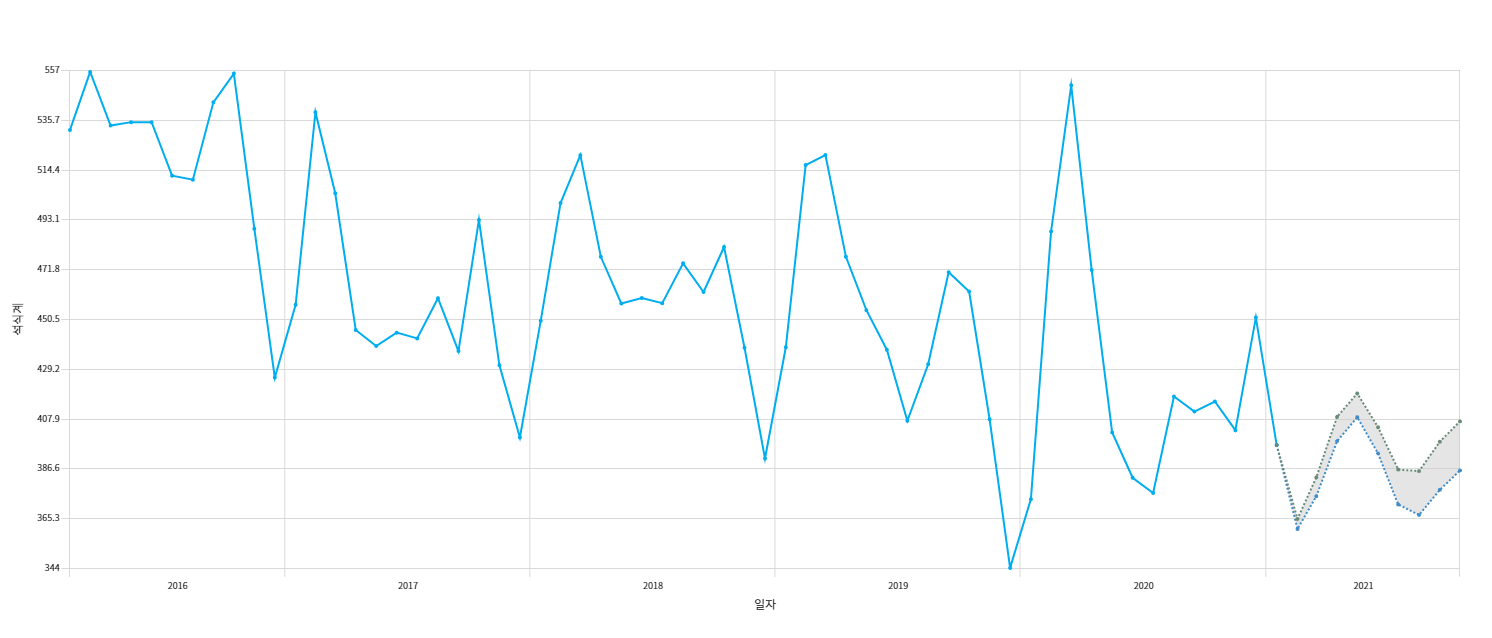

In [9]:
Image("C:/Users/user/Pictures/Camera Roll/구내식당1.png") # code안에서 나오게 할 때

- 대체적으로 2월에 중식계를 먹는 사람이 많았고, 7월 정도에는 중식계를 먹는 사람이 많이 없었다.

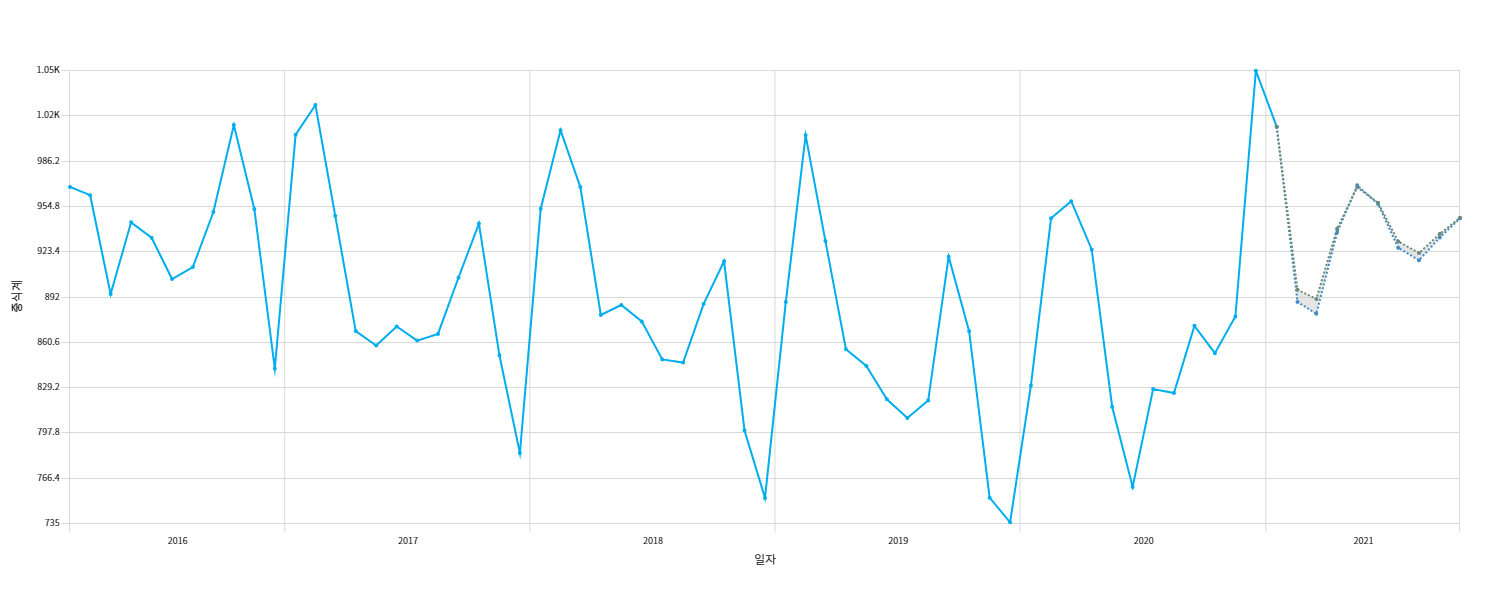

In [10]:
Image("C:/Users/user/Pictures/Camera Roll/구내식당2.png") # code안에서 나오게 할 때

- 3월 정도에는 석식계를 먹는 사람이 많았고, 12월에는 가장 적었다. (하지만 20년 12월에는 다른 년도에 비해 유독 높았다.)

(+) 석식계와 중식계를 보면 일자에 따라 시계열 특징이 보임
 - 시계열 모델도 써봐야 하나?
 - 시계열 아닌 것도 써보고 정확도를 비교해보자.

#### boxplot

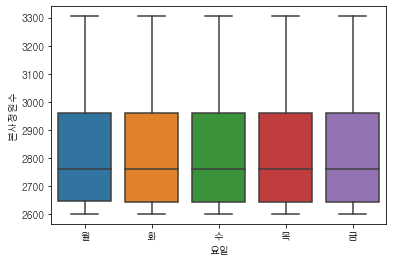

In [6]:
sns.boxplot(x = "요일", y = "본사정원수", data = Food)

plt.show()

이상값 없고, 월~금 모두 비슷 or 동일한 값 ?
- 본사정원수는 당연히 똑같겠지.. 

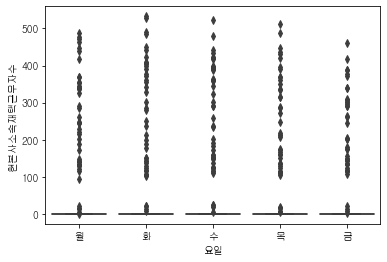

In [7]:
sns.boxplot(x = "요일", y = "현본사소속재택근무자수", data = Food)

plt.show()

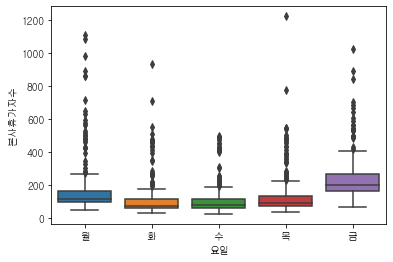

In [8]:
sns.boxplot(x = "요일", y = "본사휴가자수", data = Food)

plt.show()

- 목요일에 본사휴가자 수가 가장 최고점을 찍었다. (1200)
- 평균적으로는 금요일에 휴가자 수가 많다.

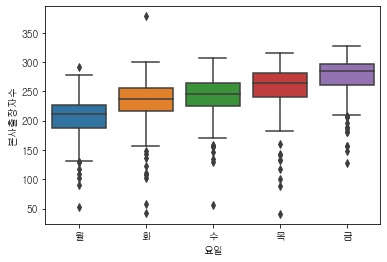

In [9]:
sns.boxplot(x = "요일", y = "본사출장자수", data = Food)

plt.show()

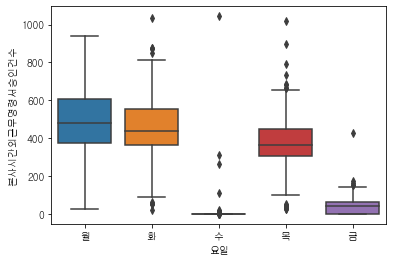

In [10]:
sns.boxplot(x = "요일", y = "본사시간외근무명령서승인건수", data = Food)

plt.show()

- 수, 금요일은 본사시간외 근무 명령서 승인건수가 가장 적다.

#### 가설 확인 및 추가 시각화

- "중식계"가 많은 날 "석식계"도 많을 것이다?
- 대체적으로 "금"요일에 석식계가 적을 것이다? (퇴근 빨리 하는 사람들이 많을 것 같다..)

##### 1

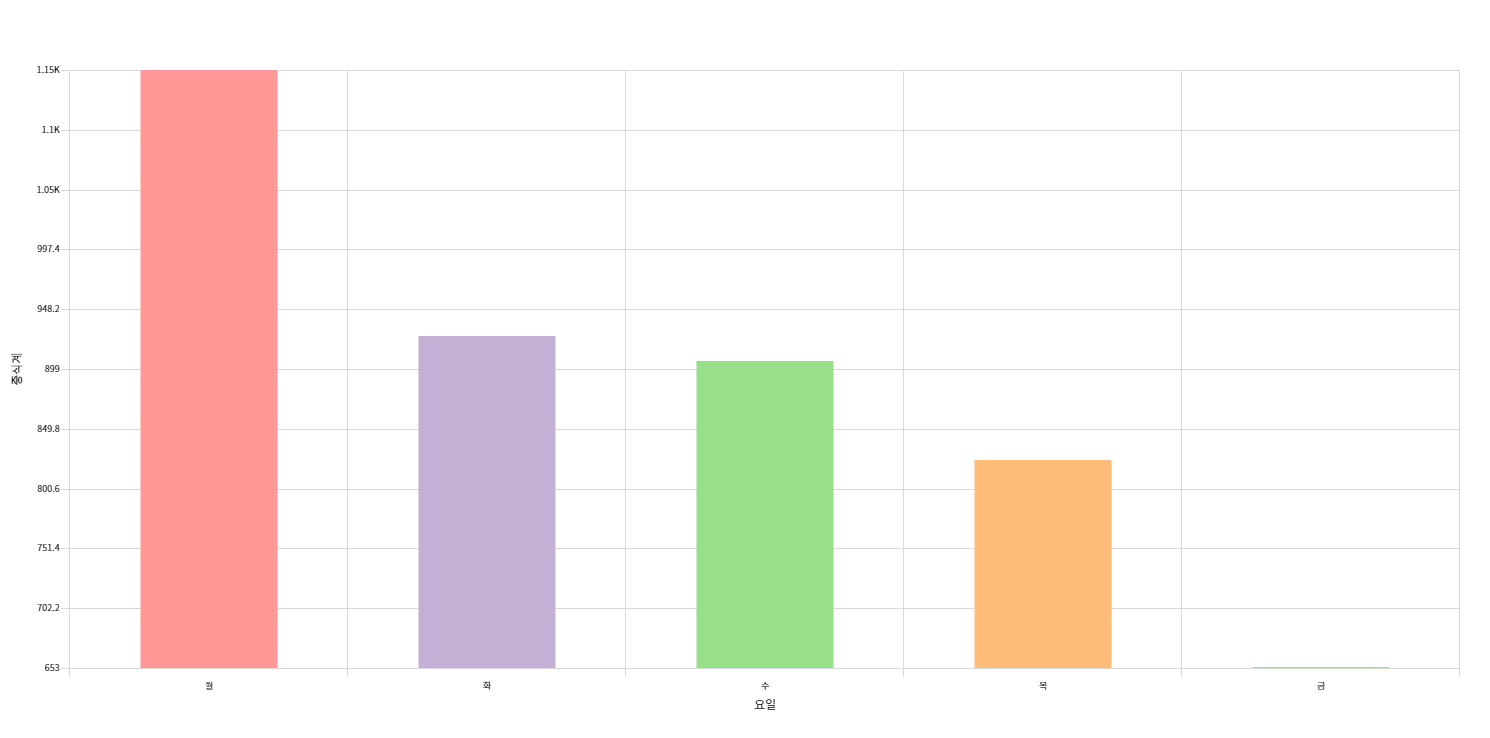

In [12]:
Image("C:/Users/user/Pictures/Camera Roll/중식계1.png") # code안에서 나오게 할 때

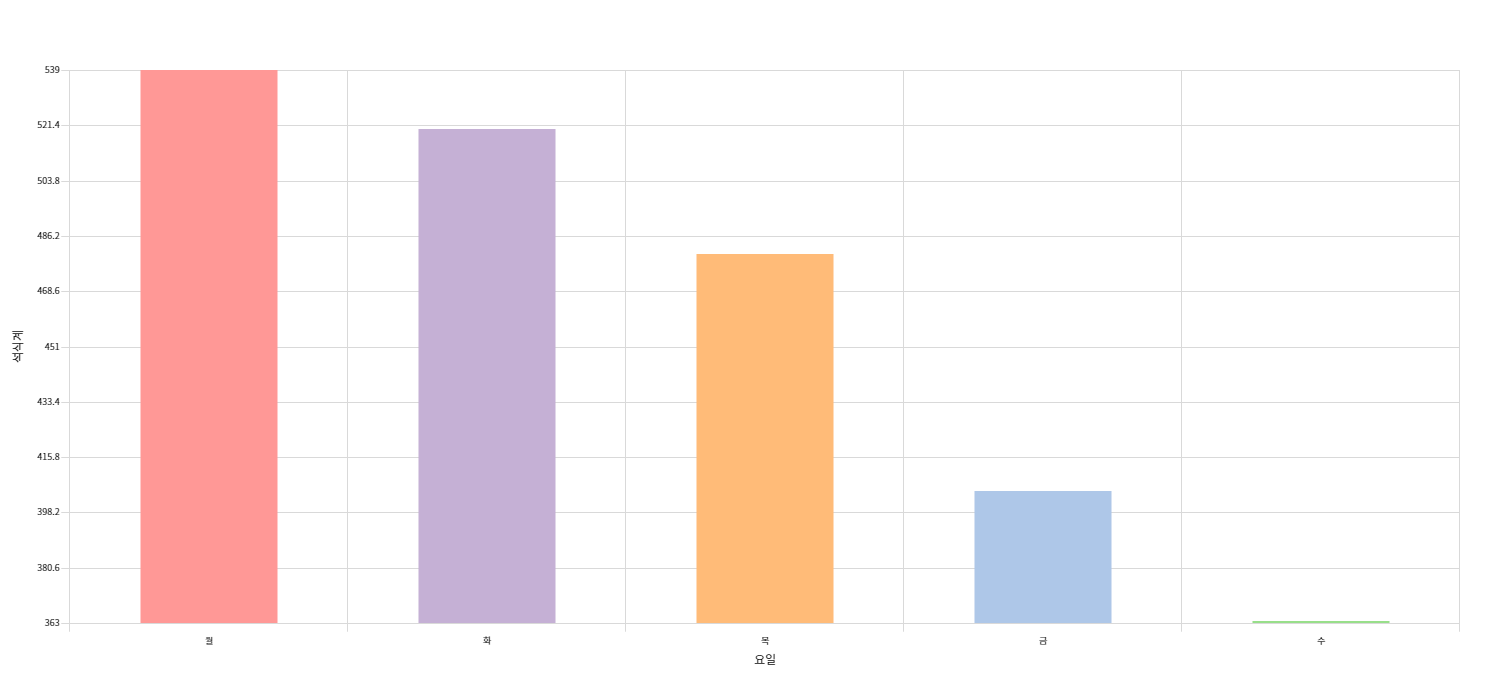

In [13]:
Image("C:/Users/user/Pictures/Camera Roll/석식계1.png") # code안에서 나오게 할 때

- 석식, 중식 모두 월, 화가 많았다. 
- 중식은 수요일에도 많이 먹었는데, 아마도? 수요일에는 대체적으로 맛있는 음식이 나와서 아닐까 추추된다.
- 금요일에 석식을 먹는 사람이 얼마 없을 것이라고 가설을 세웠는데, , , 예상 외로 수요일이 가장 적었다.

##### 2

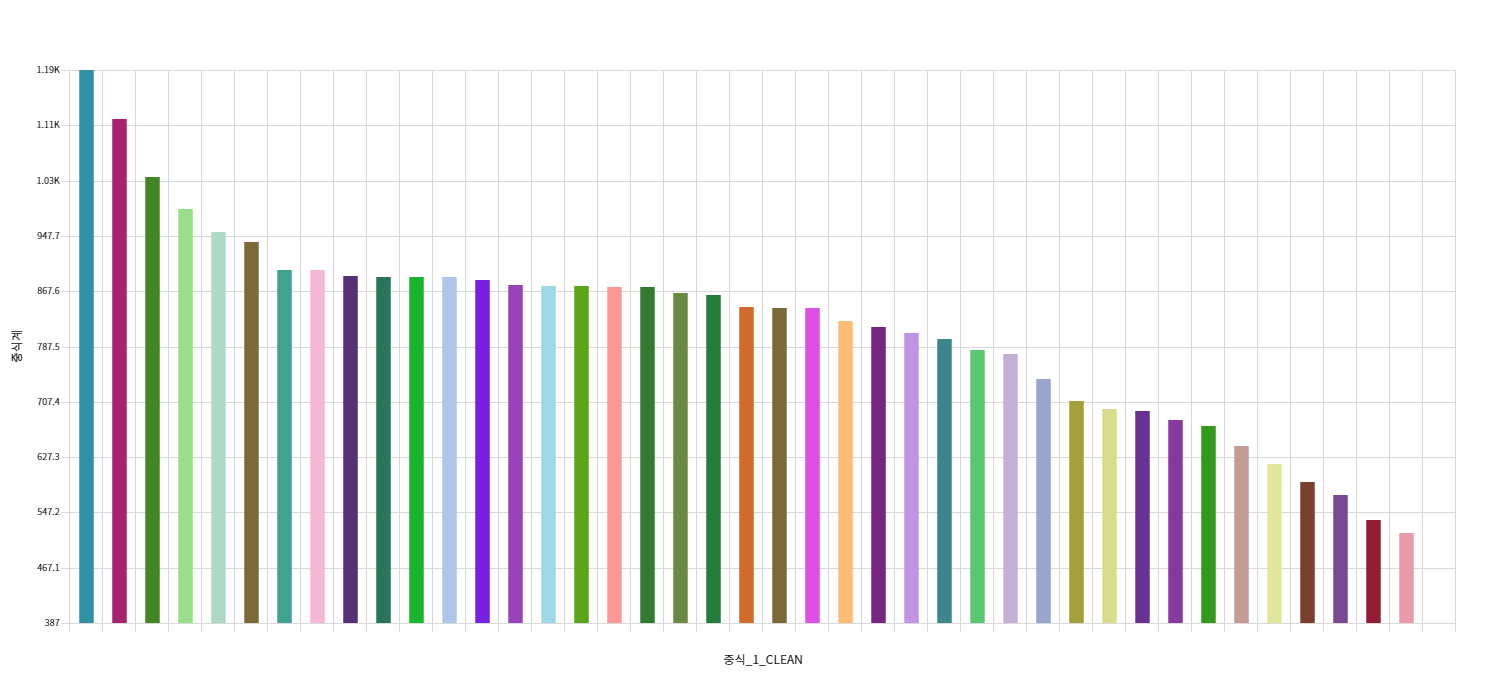

In [14]:
Image("C:/Users/user/Pictures/Camera Roll/중식계2.png") # code안에서 나오게 할 때

- 바지락비빔밥 -> 삼계탕 -> 봄새싹비빔밥 -> 계란채소볶음밥 -> 열무비빔밥 -> 낙지볶음밥 -> 일반밥 순으로 많이 먹었다.
- 메뉴보고 사람들이 먹었는지 궁금하다.

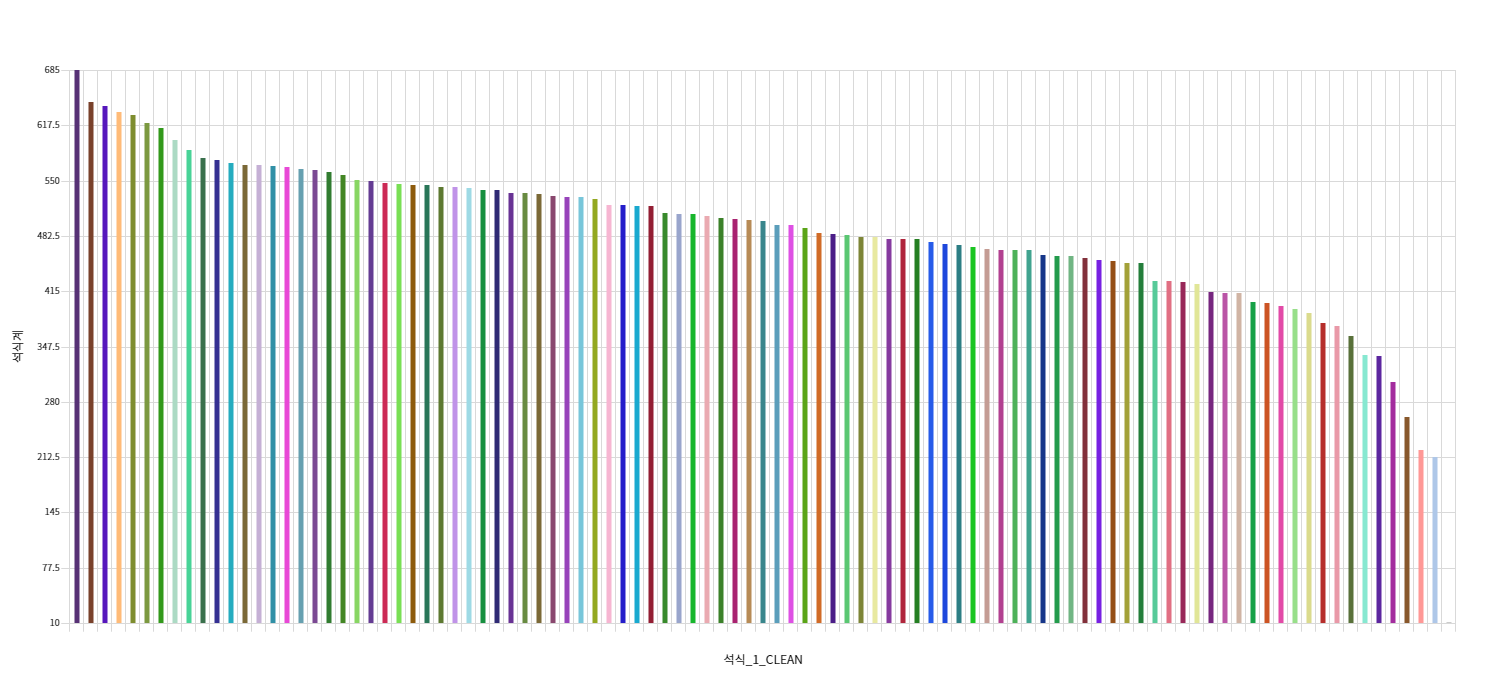

In [15]:
Image("C:/Users/user/Pictures/Camera Roll/석식계2.png") # code안에서 나오게 할 때

- 마파두부 -> 마늘베이컨볶음밥 -> 참치덮밥 -> 고추잡채덮밥 -> 투움바 스파게티 -> 짜장면 순으로 나왔다. 
- 여기도 메뉴보고 석식 먹었는지 궁금하다. 그런데 중식계랑 겹치는 메뉴가 딱히 없다.